**Titanic ML Dataset Demo**

Importing Packages and Loading in the Data

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

train_data = pd.read_csv('titanic_data/train.csv')
test_data = pd.read_csv('titanic_data/test.csv')

**Understanding your Data**

Go to https://www.kaggle.com/c/titanic/data to get a better understanding of the dataset and what each of it's columns mean.

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Exploratory Data Analysis (EDA)**: using simple visualizations and summary statistics to get a better understanding of the attributes of your dataset.

For categorical variables: use .value_counts()

For quantitative variables: use .describe() or .hist()

In [4]:
# Primary predictive task: predict who survives and who doesn't
print(train_data['Survived'].value_counts())  # number of passengers that survived (1) or did not (0)

# Potentially predictive features
# print(train_data['Pclass'].value_counts()) # number of passengers in each counts
# print(train_data['Sex'].value_counts()) # number of passengers by Sex
# print(train_data['Embarked'].value_counts()) # number of passengers embarked at each port
# print(train_data['Age'].describe()) # summary statistics on the age of passengers
# train_data['Age'].hist(bins=8) # histogram of age grouped in bins of 10 years

0    549
1    342
Name: Survived, dtype: int64


After looking at the counts of different features, let's see how the features are dependent on one another

In [5]:
print(train_data[train_data['Pclass'] == 1])
first_class = train_data[train_data['Pclass']==1]
print(first_class['Survived'].mean())

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
11            12         1       1   
23            24         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
..                                                 ...     ...   ... 

We can do the above for each class then compare the percentages of survival rate by classes, but their is an easier way to do this.  We can use `.groupby(column_name)` and `.apply(function)` or `.agg({'column_name':'summary_statistic'})` 

Here is an example of what a pandas groupby is doing

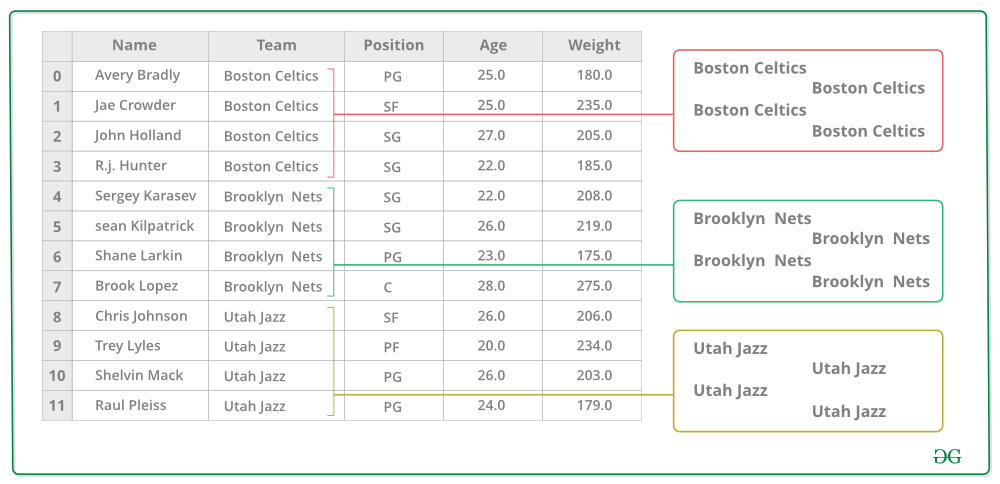

In [6]:
print(train_data.groupby('Pclass'))
print(train_data.groupby('Pclass').agg({'Age':'mean', 'Survived':'mean'}))

train_data['Age_bucket'] = train_data['Age'].apply(lambda age: int(age / 10))

print(train_data.groupby('Age_bucket').agg({'Survived':'mean'}))

              Age  Survived
Pclass                     
1       38.233441  0.629630
2       29.877630  0.472826
3       25.140620  0.242363


ValueError: cannot convert float NaN to integer

In [22]:
# We will start visualizing our data
sns.barplot?
## Understanding the relationship between different variables and how they affect the outcome, Survive vs Didn't Survive

# sns.barplot(data=train_data, x='Pclass', y='Survived') 

# sns.barplot(data=train_data, x='Survived', y='Age')

# sns.barplot(data=train_data, x='Survived', y='Age', hue='Pclass')

# sns.barplot(data=train_data, x='Pclass', y='Age', hue='Survived')

# sns.scatterplot(data=train_data, x='Age', y='Fare', hue='Survived')

In [47]:
# sns.barplot(data=train_data, x='Sex', y='Survived')

# sns.barplot(data=train_data, x='Sex', y='Age')

# sns.barplot(data=train_data, x='Sex', y='Fare')

# train_data.groupby('Sex').agg({'Pclass':'mean'})

# sns.barplot(data=train_data, x='Sex', y='Fare', hue='Pclass')

**Data Cleaning**: Getting your data in the right format to apply ML.  This involves removing or imputing null values, cleaning up messy data values, and transorming your data into valuable features.

In many 'toy' ML datasets such as the Titanic dataset, data cleaning is usually not as big a concern as it is for industry data.

In [70]:
# Let's look at null values in the Titanic ML dataset
train_data.isnull().sum()

train_data[train_data['Age'].isnull()]
# age_null = train_data[train_data['Age'].isnull()]
# age_null[['Pclass','Survived']].mean()
# train_data[['Pclass', 'Survived']].mean()
age_null[['Pclass','Survived']].mean() - train_data[['Pclass', 'Survived']].mean()
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median()) # set this equal to train_data['Age']

Pclass      0.290228
Survived   -0.090053
dtype: float64

In [69]:
cabin_null = train_data[train_data['Cabin'].isnull()]
cabin_null[['Pclass','Survived']].mean() - train_data[['Pclass', 'Survived']].mean()

Pclass      0.330368
Survived   -0.083984
dtype: float64

**Feature Extraction and Engineering**: Find the most predictive features and transform features into an ML format. Feature engineering is sometimes used interchangeably with Data Cleaning.

In [71]:
train_data.head()  # we need to convert this to a set of features X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_data[['Survived']]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


**One Hot Encoding**: Commonly used to encode categorical variables as vectors, OHE creates a new column for each unique value of a variable.

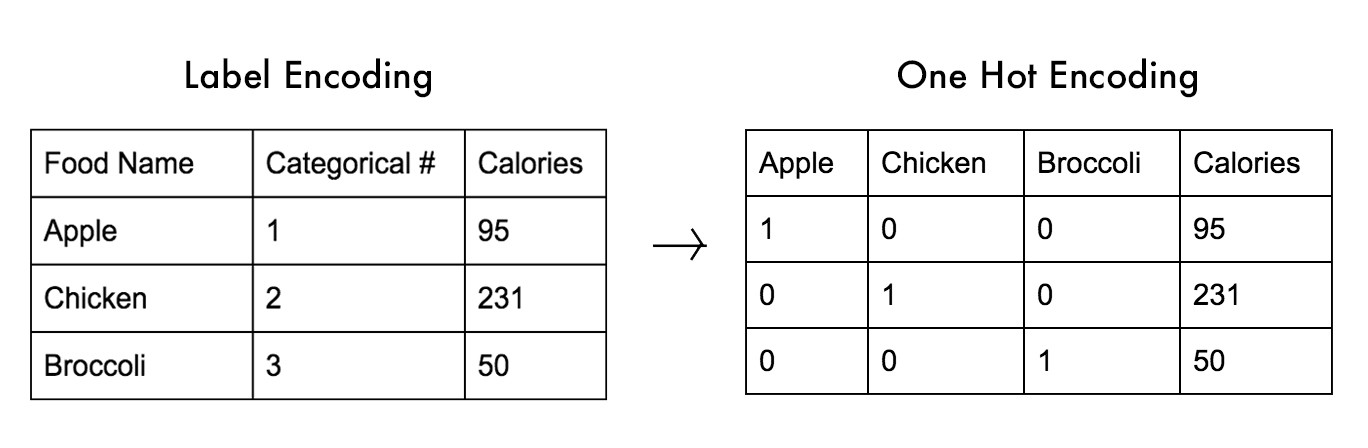

In [92]:
# Using pd.get_dummies() to encode variables
ohe_sex = pd.get_dummies(train_data['Sex'])
X = X.merge(ohe_sex, left_index=True, right_index=True)
print(X)

ohe_embarked = pd.get_dummies(train_data['Embarked'])
X = X.merge(ohe_embarked, left_index=True, right_index=True)
print(X)

X = X.drop(['Sex', 'Embarked'], axis=1)

In [102]:
sc = StandardScaler()
X[['Age_std', 'Fare_std']] = sc.fit_transform(X[['Age','Fare']])
X = X.drop(['Age', 'Fare'], axis=1)

**Model Selection and Performance**: Since this is a classification problem, we canuse models such as kNN, Logistic Regression, Support Vector Machines, Decision Trees, and more.  For the purpose of this notebook we will choose a decision tree classifier.

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [120]:
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)
# y_pred = dc.predict(X_test)
dc.score(X_test, y_test)

**Hyperparameter selection** To be continued...